## Introduction

In this activity we will use python to better understand the advection-dispersion equation and plot some of the solutions.

In [1]:
# Import the neccesary libraries
# Import only the scipy.special.erfc (complementary error function) and 
#     scipy.special.erf (error function) from the scipy Library
from scipy.special import erfc as erfc
from scipy.special import erf as erf
import numpy as np
import math
import matplotlib.pyplot as plt

## Analytical model 
### Setup

Now let's define some of the characteristics of the system that we want to model. For conceptual simplicity lets imagine a homogenous sand column, similiar to the ones you worked with in lab in GEOSCI/GEOENG 627. First define the initial (t=0) conditions and boundary conditions (inlet and outlet).

In [2]:
# length of experiment (time in seconds)
experiment_length = 60*30;
# define a time vector to calculate the analytical solution at many different times at once (this is vectorization!)
t = np.linspace(0.1, experiment_length, num=100)
# Injection rate (mL/min)
q = 5
# Injected concentration
C0 = 1
# Initial concentration
Ci = 0

Now lets define some (arbitrary) column properties

In [3]:
# Column length (cm)
x = 10
col_radius = 2.5
# porosity
phi = 0.3;
# dispersivity [cm] 
dispersivity = 0.3 

Note that the 'dispersivity' is the alpha in the equations from the course notes. This must be multiplied by the advection velocity to get dispersion. Lets calculate the dispersion.

In [11]:
# calculate advection velocity
area = math.pi*(col_radius)**2
v = q/60/area/phi # divide by 60 to get flow rate from cm/min to cm/sec
print("advection velocity: " + str(v))

# Dispersion
D = v*dispersivity
print(D)

advection velocity: 0.014147106052612919
0.004244131815783875


#### What are the units of dispersion again?

### Analytical solution: Type 1 boundary conditions and continous solute injection

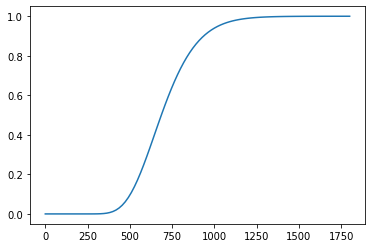

In [5]:
# Analytical solution: See lecture slides or (Parker and van Genuchten, 1984) for details
def ADE_type1_fun(x, t, v, D, C0):
    # Note that the '\' means continued on the next line
    C = C0*((1/2)*erfc((x - v*t)/(2*np.sqrt(D*t))) + \
        (1/2)*np.exp(v*x/D)*erfc((x + v*t)/(2*np.sqrt(D*t))))
    # Return the concentration (C) from this function
    return C

# Now call our function
Conc_time_type1 = ADE_type1_fun(x, t, v, D, C0)
# Plot the results as a function of time
plt.plot(t, Conc_time_type1)

Note that the complementary error function (erfc) is back. Do you remember the shape of this curve from the diffusion demo?

#### What do we call this plot again (concentration profile or breakthrough curve)? Label the axis...

### Analytical solution: Type 3 boundary conditions and continous solute injection

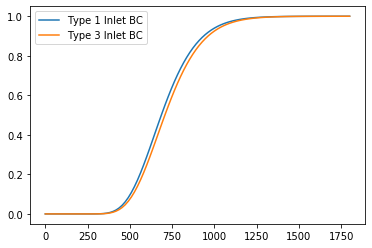

In [7]:
# Analytical solution: See lecture slides or (Parker and van Genuchten, 1984 eq 9b) for details
def ADE_type3_fun(x, t, v, D, C0):
    C = C0*((1/2)* erfc((x - v*t)/(2* np.sqrt(D*t))) + \
        np.sqrt((v**2*t)/(math.pi*D))* np.exp(-(x - v*t)**2/(4*D*t)) - \
        (1/2)*(1 + (v*x/D) + (v**2*t/D))* np.exp(v*x/D)* erfc((x + v*t)/(2* np.sqrt(D*t))))
    return C
    
# Now call our function
Conc_time_type3 = ADE_type3_fun(x, t, v, D, C0)

# Plot the results as a function of time
plt.plot(t, Conc_time_type1, label='Type 1 Inlet BC')
plt.plot(t, Conc_time_type3, label='Type 3 Inlet BC')

# Format the plots
plt.legend()

Note that the input and system geometry is identical except for the boundary conditions!

## Activity:
Using these functions, evaluate how the shape of the curves depends on the dispersion. Describe and discuss what you see. If two cores have identical geometry and flow rate conditions but different dispersion behavior, what does this mean? 

Next, use the principle of superposition to analytically describe a finite pulse of solute, as opposed to the continuous injection currently being modeled. See van Genuchten and Alves 1982 for formal descriptions and additional solutions.

### Principle of superposition 

As we saw in GEOSCI 627, the superposition of analytical solutions is a powerful tool for describing systems with more complex initial conditions. The principle of superposition

To apply superposition we need a few conditions to be true. First, we need a “linear” differential equation. That is, one for which: a) the dependent variable and all its derivatives are of the first degree (i.e. the power on any dependent variable terms is one) b) the coefficients are constants or functions of only the independent variable(s) The second condition is that we the differential equation needs to be homogeneous. A linear differential equation is mathematically homogeneous if the term(s) without the dependent variable equal zero.

When the advection-diffusion equation (ADE) is linear and homogeneous, sums of the solutions are also linear. This important condition allows us to use the principle of superposition to analytically solve the ADE and the diffusion equation for relative complex (i.e. mixed or inhomogeneous) boundary and initial conditions. As described by Bear (1972) "The principle of superposition means that the presence of one boundary condition does not affect the response produced by the presence of other boundary or initial conditions. Therefore, to analyze the combined effect of a number of boundary conditions (excitations) we may start by solving for the effect of each individual excitation and then combine the results." For example, the principle of superposition is often used to analytically describe the transport behavior of finite pulse of solute.

Work through the example below to see an illustration of this principle.

### Analytical solution: Type 1 boundary conditions and pulse solute injection

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


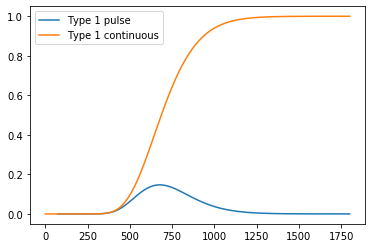

In [8]:
# Define the length of time of the pulse injection
t_pulse = 60
# Define the time array shifted by the length of pulse injection
t_t0 = t-t_pulse

# Now call our function
Conc_time_type1_t = ADE_type1_fun(x, t, v, D, C0)
Conc_time_type1_t_t0 = ADE_type1_fun(x, t_t0, v, D, C0)

Conc_pulse_solution = Conc_time_type1_t - Conc_time_type1_t_t0

# Plot the results as a function of time
plt.plot(t, Conc_pulse_solution, label='Type 1 pulse')
plt.plot(t, Conc_time_type1, label='Type 1 continuous')

# Format the plots
plt.legend()

#### Side note
If you started the 't' array from zero and then subtracted some time of injection then 't_t0 = t-t_pulse' will have negative numbers. Negative numbers in the 'erfc' and 'sqrt' function are what lead to the warning above. To make our function more robust we can use the ```np.real``` numpy function to our time variable inside the 'erfc' functions, or we can record the location of negative values of ```t``` (see 'indices_below_zero'). Set ```t``` at these locations equal to some arbitrary positive number, and then make sure to set the corresponding concentrations equal to zero.

In [9]:
# Analytical solution without errors when negative times are input
def ADE_type1_real_fun(x, t, v, D, C0):
    # Identify location of negative values in time array
    indices_below_zero = t <= 0
    if indices_below_zero.any() == True:
        # set values equal to 1 (but this could be anything)
        t[indices_below_zero] = 1
    
    # Note that the '\' means continued on the next line
    C = C0*((1/2)*erfc((x - v*t)/(2*np.sqrt(D*t))) + \
         (1/2)*np.exp(v*x/D)*erfc((x + v*t)/(2*np.sqrt(D*t))))
    
    if indices_below_zero.any() == True:
        # Now set concentration at those negative times equal to 0
        C[indices_below_zero] = 0
        
    # Return the concentration (C) from this function
    return C

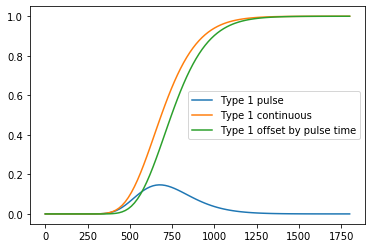

In [10]:
# Now call our function
Conc_time_type1_t = ADE_type1_real_fun(x, t, v, D, C0)
Conc_time_type1_t_t0 = ADE_type1_real_fun(x, t_t0, v, D, C0)

Conc_pulse_solution = Conc_time_type1_t - Conc_time_type1_t_t0

# Plot the results as a function of time
plt.plot(t, Conc_pulse_solution, label='Type 1 pulse')
plt.plot(t, Conc_time_type1, label='Type 1 continuous')
plt.plot(t, Conc_time_type1_t_t0, label='Type 1 offset by pulse time')

# Format the plots
plt.legend()

In the plot above the 'continous line' minus the 'offset by pulse time' equal the 'pulse' solution. Pretty cool huh!?

How does changing ```t_pulse``` (in the first code cell of this activity) change the shape of the curve 'Type 1 pulse' curve? How would you determine the value of ```t_pulse``` if I asked you to model the case of 10 mL of solute injected?